# Aggregated Seed Metrics
Generated from `outputs/LLM-evaluation/seed_aggregate_metrics_from_judged.json`.
This notebook loads the aggregated JSON and shows comparison tables and plots.


## Requirements
Install the plotting and data libraries if needed:
```
pip install pandas matplotlib seaborn
```


,model_short,condition,finetuned,few_shot,num_seeds,accuracy_mean,accuracy_std,exact_match_mean,exact_match_std,exact_match_rate_mean,...,latency_mean_ms_std,latency_p50_ms_mean,latency_p50_ms_std,latency_p95_ms_mean,latency_p95_ms_std,latency_p99_ms_mean,latency_p99_ms_std,latency_total_ms_mean,latency_total_ms_std,confidence_score
0,ds-r1-qwen-32b,baseline_few_shot,False,True,12,0.661208,0.115800,0.060109,0.020446,0.060133,...,67.402189,2961.810000,83.771747,3926.883333,107.430599,5415.816667,706.852790,1.826429e+05,4111.496930,0.624233
1,ds-r1-qwen-32b,baseline_zero_shot,False,False,16,0.504106,0.190172,0.020492,0.021296,0.020500,...,284.896718,2945.137500,122.687270,5329.075000,533.822599,11846.017500,4188.714184,2.061350e+05,17378.743118,0.452625
2,ds-v3.2,baseline_few_shot,False,True,16,0.735656,0.091241,0.114754,0.050528,0.114750,...,1382.243458,1428.435000,107.682832,9949.357500,9402.714806,19839.642500,13061.348184,1.752786e+05,84316.954721,0.611550
3,ds-v3.2,baseline_zero_shot,False,False,20,0.628700,0.125199,0.042623,0.013115,0.042640,...,1136.605604,1516.742000,135.578816,11993.406000,8482.528400,24748.880000,8748.168483,2.140458e+05,69333.076829,0.556400
4,gemma3-27b,baseline_few_shot,False,True,16,0.703894,0.107869,0.131148,0.040156,0.131125,...,491.518523,34027.037500,488.494341,34230.077500,582.882328,34460.932500,529.826396,2.076338e+06,29982.517916,0.584575
5,gemma3-27b,baseline_zero_shot,False,False,16,0.461075,0.199845,0.045082,0.017864,0.045100,...,951.927785,34627.845000,873.025223,35654.132500,2024.165074,36149.647500,2331.237084,2.119603e+06,58067.703831,0.413525
6,gpt-4.1,baseline_few_shot,False,True,20,0.727055,0.102274,0.081967,0.037383,0.081980,...,28.561506,1368.196000,14.926473,1995.612000,277.944197,2421.644000,115.484787,8.671196e+04,1742.157476,0.585940
7,gpt-4.1,baseline_zero_shot,False,False,20,0.702460,0.098127,0.029508,0.016062,0.029520,...,458.421403,1540.740000,22.954162,2128.994000,298.441919,8724.926000,11943.332017,1.129419e+05,27963.659572,0.608260
8,gpt-5.2,baseline_few_shot,False,True,20,0.755740,0.088723,0.085246,0.040687,0.085260,...,107.674144,1681.510000,34.664066,2830.564000,506.650576,3986.238000,974.689578,1.137941e+05,6568.229913,0.649700
9,gpt-5.2,baseline_zero_shot,False,False,16,0.711075,0.093441,0.024590,0.014197,0.024600,...,297.940074,1809.962500,54.444477,2689.520000,369.578100,6133.015000,5068.451642,1.261589e+05,18174.471746,0.680850



=== Top 10 Most Accurate Models (with Confidence Scores) ===


,model_short,condition,accuracy_mean,confidence_score,num_seeds
8,gpt-5.2,baseline_few_shot,0.755740,0.649700,20
2,ds-v3.2,baseline_few_shot,0.735656,0.611550,16
6,gpt-4.1,baseline_few_shot,0.727055,0.585940,20
32,qwen-7b,finetuned_few_shot,0.723247,0.828976,17
9,gpt-5.2,baseline_zero_shot,0.711075,0.680850,16
15,llama-8b,finetuned_zero_shot,0.707380,0.750800,20
10,llama-70b,baseline_few_shot,0.706963,0.576575,16
14,llama-8b,finetuned_few_shot,0.705730,0.753640,20
4,gemma3-27b,baseline_few_shot,0.703894,0.584575,16
7,gpt-4.1,baseline_zero_shot,0.702460,0.608260,20


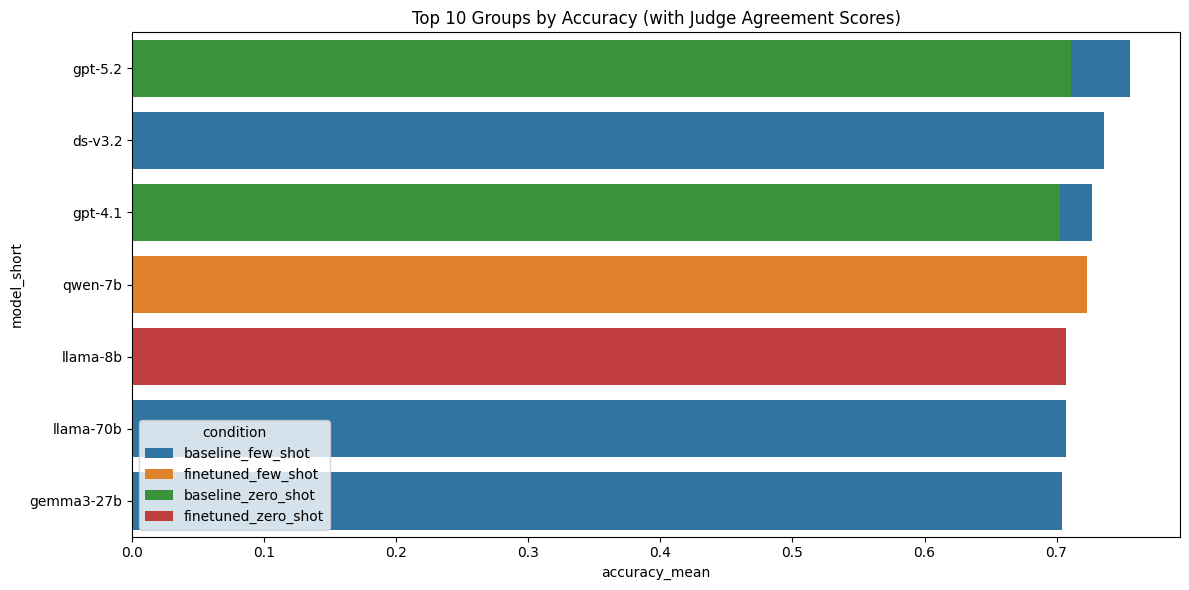

In [2]:
import json
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # seaborn should be installed in the notebook kernel
from IPython.display import display
# Use POSIX-style path to avoid Windows backslash escape warnings
PATH = '/home/infres/vperlic/projects/nl2atl/outputs/LLM-evaluation/seed_aggregate_metrics_from_judged.json'
with open(PATH, 'r', encoding='utf-8') as fh:
    aggregates = json.load(fh)
rows = []
for g in aggregates:
    row = {k: g.get(k) for k in ('model_short','condition','finetuned','few_shot','num_seeds')}
    for metric,vals in (g.get('metrics') or {}).items():
        row[f'{metric}_mean'] = vals.get('mean')
        row[f'{metric}_std'] = vals.get('std')
    # Add confidence score (mean if aggregated)
    judge_agreement = g.get('judge_agreement', {})
    conf_score = judge_agreement.get('confidence_score')
    if isinstance(conf_score, dict):
        row['confidence_score'] = conf_score.get('mean')
    else:
        row['confidence_score'] = conf_score
    rows.append(row)
df = pd.DataFrame(rows)
display(df.sort_values(by=['model_short','condition']).head(20))
# Show top models by accuracy with confidence scores
if 'accuracy_mean' in df.columns:
    top_models = df.sort_values('accuracy_mean', ascending=False).head(10)
    display_cols = ['model_short', 'condition', 'accuracy_mean', 'confidence_score', 'num_seeds']
    print('\n=== Top 10 Most Accurate Models (with Confidence Scores) ===')
    display(top_models[[c for c in display_cols if c in top_models.columns]])
    plot_df = top_models
    plt.figure(figsize=(12,6))
    sns.barplot(data=plot_df, x='accuracy_mean', y='model_short', hue='condition', dodge=False)
    plt.title('Top 10 Groups by Accuracy (with Judge Agreement Scores)')
    plt.tight_layout()
    plt.show()


In [3]:
# Display aggregated table, ranking by accuracy_mean when available
if 'accuracy_mean' in df.columns:
    display(df.sort_values(by='accuracy_mean', ascending=False).head(20))
else:
    display(df.sort_values(by=['model_short','condition']).head(20))


,model_short,condition,finetuned,few_shot,num_seeds,accuracy_mean,accuracy_std,exact_match_mean,exact_match_std,exact_match_rate_mean,...,latency_mean_ms_std,latency_p50_ms_mean,latency_p50_ms_std,latency_p95_ms_mean,latency_p95_ms_std,latency_p99_ms_mean,latency_p99_ms_std,latency_total_ms_mean,latency_total_ms_std,confidence_score
8,gpt-5.2,baseline_few_shot,False,True,20,0.755740,0.088723,0.085246,0.040687,0.085260,...,107.674144,1681.510000,34.664066,2830.564000,506.650576,3986.238000,974.689578,1.137941e+05,6568.229913,0.649700
2,ds-v3.2,baseline_few_shot,False,True,16,0.735656,0.091241,0.114754,0.050528,0.114750,...,1382.243458,1428.435000,107.682832,9949.357500,9402.714806,19839.642500,13061.348184,1.752786e+05,84316.954721,0.611550
6,gpt-4.1,baseline_few_shot,False,True,20,0.727055,0.102274,0.081967,0.037383,0.081980,...,28.561506,1368.196000,14.926473,1995.612000,277.944197,2421.644000,115.484787,8.671196e+04,1742.157476,0.585940
32,qwen-7b,finetuned_few_shot,True,True,17,0.723247,0.067444,0.469624,0.083010,0.469629,...,51.446217,1045.635882,48.656419,1497.154706,88.564822,2247.784118,441.696001,6.560864e+04,3138.203748,0.828976
9,gpt-5.2,baseline_zero_shot,False,False,16,0.711075,0.093441,0.024590,0.014197,0.024600,...,297.940074,1809.962500,54.444477,2689.520000,369.578100,6133.015000,5068.451642,1.261589e+05,18174.471746,0.680850
15,llama-8b,finetuned_zero_shot,True,False,20,0.707380,0.081685,0.426230,0.052867,0.426220,...,50.883286,1162.810000,65.276277,1682.658000,69.319015,2353.302000,358.337973,7.218621e+04,3103.945359,0.750800
10,llama-70b,baseline_few_shot,False,True,16,0.706963,0.129974,0.086066,0.029268,0.086075,...,48.477864,2056.947500,59.932394,2957.232500,137.929570,5841.555000,309.031894,1.345166e+05,2957.257468,0.576575
14,llama-8b,finetuned_few_shot,True,True,20,0.705730,0.082872,0.426230,0.072577,0.426220,...,29.580850,1171.690000,45.563567,1746.102000,38.022941,2364.200000,475.148604,7.381916e+04,1804.467576,0.753640
4,gemma3-27b,baseline_few_shot,False,True,16,0.703894,0.107869,0.131148,0.040156,0.131125,...,491.518523,34027.037500,488.494341,34230.077500,582.882328,34460.932500,529.826396,2.076338e+06,29982.517916,0.584575
7,gpt-4.1,baseline_zero_shot,False,False,20,0.702460,0.098127,0.029508,0.016062,0.029520,...,458.421403,1540.740000,22.954162,2128.994000,298.441919,8724.926000,11943.332017,1.129419e+05,27963.659572,0.608260
